# Aprendizaje supervisado: Clasificación.

## *Ejemplo 2: Clasificación binaria de tumores venignos y malignos*

**Objetivo:** Obtener un modelo de ML para clasificar si es una espícula maligna o venigna. Se deberán seguir las 5 fases (ver figura de abajo) para la evaluación del modelo de clasificación.


### Antes de empezar:

* En el archivo **Data/breast_data_raw.csv** se encuentra el conjunto de datos de entrada con algunos errores en los atributos.
* En el archivo **Data/breast_data_raw.csv** se encuentra el conjunto de datos de enetrada sin errores.


<img src="Figures/Fases.png" alt="Drawing" style="width: 800px;"/>

## Fase 0. Cargar conjunto de datos

In [45]:
# Importación de Librerias

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import pandas as pd
import matplotlib.pyplot as plt                    

In [46]:
# Cargamos el conjunto de datos de entrada. 

breast_panda = pd.read_csv('Data/breast_data.csv')  # Importar data-set
breast_panda.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Fase 1. Comprender los datos

In [47]:
# ¿Cúantos atributos y diferentes clases existen en el set de datos?


In [48]:
# Obtener un resumen estadístico del set de datos con función describe.



In [49]:
# Obtener los histogramas (distribución de datos) para cada uno de los atributos.



In [50]:
# Obtener la grafica de densidades del set para cada atributo.


Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo picos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

In [51]:
# Obtener el diagrama de caja para cada uno de los atributos.



El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Que atributo llama la atención por sus valores atípicos?**. 

In [52]:
# Realizar un plot de correlación de los datos de los atributos con los outputs.(Opcional de hacer)

## 2. Preparar los datos

Para realizar esta fase usaremos los datos que contienen algunos errores "sinteticos". Se deberá importar el archivo 'Data/breast_data_raw.csv'.

In [53]:
# Cargamos el conjunto de datos de entrada. 

breast_panda = pd.read_csv('Data/breast_data_raw.csv')  # Importar data-set
breast_panda.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,NaN,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [54]:
# Comprobar si existen datos faltantes Nan en los datos de entrada.

In [55]:
# Rellenar los missing values de cada atributo con el valor anterior del atributo. 


In [56]:
# Comprobar que se han aplicado los cambios



In [57]:
# Para convertir la etiqueta (Maligno/Venigno) a valores binarios 1/0.

from sklearn.preprocessing import LabelEncoder

breast_panda = pd.read_csv('Data/breast_data.csv')  # Importar CLEAN data-set in order to train model.

lab_encoder = LabelEncoder() 
lab_encoder.fit(breast_panda['diagnosis'])  
print(lab_encoder.classes_)  # Muestra las clases diferentes que hay

breast_panda['diagnosis'] = lab_encoder.transform(breast_panda['diagnosis'])
print(breast_panda)

['B' 'M']
           id  diagnosis  radius_mean  texture_mean  perimeter_mean  \
0      842302          1        17.99         10.38          122.80   
1      842517          1        20.57         17.77          132.90   
2    84300903          1        19.69         21.25          130.00   
3    84348301          1        11.42         20.38           77.58   
4    84358402          1        20.29         14.34          135.10   
..        ...        ...          ...           ...             ...   
564    926424          1        21.56         22.39          142.00   
565    926682          1        20.13         28.25          131.20   
566    926954          1        16.60         28.08          108.30   
567    927241          1        20.60         29.33          140.10   
568     92751          0         7.76         24.54           47.92   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0       1001.0          0.11840           0.27760         0.30010   

### P: ¿Porqué se tiene que convertir en una variable numérica la etiqueta de Maligno/Venigno?

In [58]:
# Hacer una normalización de todos los atributos (Sin considerar el ID column y la clase)
breast_panda_features = breast_panda.iloc[:, 2:]  #Seleccionar solo los atributos deseados

In [59]:
breast_panda_features.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
breast_panda_features_sc = breast_panda_features.copy()
breast_panda_features_sc = pd.DataFrame(scaler.fit_transform(breast_panda_features))  # FIT() + TRANSFORM()
breast_panda_features_sc.columns = breast_panda_features.columns
breast_panda_features_sc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


## 3. Dividir Datos

En este paso se tendra que realizar la división de los datos de entrenamiento 70%, Datos de Validación 15%, Datos de Prueba 15%. 

Primero, divido los datos en:
* Features/características/atributos/variables de entrada: X
* Target/etiquedas: Y

In [61]:
# Atributos X (features); etiquetas y (target)
X = breast_panda_features_sc                      # Seleccionamos los atributos en este caso 30
X = X.to_numpy()                                  # Para convertir a formato tipo array (matriz)

In [62]:
Y = breast_panda[["diagnosis"]]                   # Seleccionamos la clase (output)
Y = Y.to_numpy()                                  # Para convertir a formato tipo array (matriz)

In [63]:
from sklearn.model_selection import train_test_split

test_size = 0.20  # porcentaje de los datos a dividir

# Divido los datos en datos de entreno 64%, validación 16% y prueba 20%

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, shuffle=False) #20% Test Data and 80% Train Data

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, shuffle=False) # 64% Test Data and 16% validation

### P. ¿Qué ventajas nos supone trabajar con datos con formato tipo array?

In [64]:
# Revisar el tamaño de cada variable creada con función de shape.

## 4. Construcción y evaluación de modelos

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb  

num_folds = 5
error_metrics = {'balanced_accuracy'}
models = { ('LR', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
           ('RF', RandomForestClassifier())
         }

results = [] # guarda los resultados de las métricas de evaluación
names = []  # Nombre de cada algoritmo
msg = []  # imprime el resumen del método de cross-validation

Métrica de evaluación:  balanced_accuracy
Modelo  KNN
Modelo  LR
Modelo  RF
[('KNN', 0.9372554573086488, 0.04050329499601179), ('LR', 0.9421068010936432, 0.04330117238152741), ('RF', 0.9377571552188014, 0.04689447314963307)]


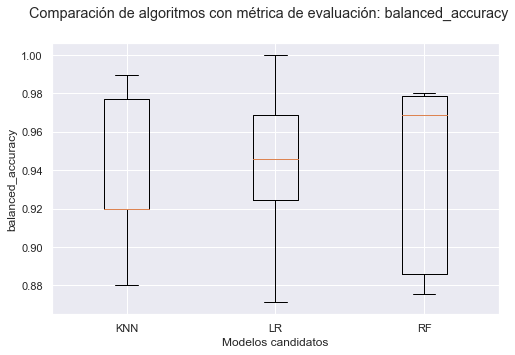

In [66]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold, TimeSeriesSplit
import seaborn as sns
import numpy as np

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Métrica de evaluación: ', scoring)
    for name, model in models:
        print('Modelo ', name)
        cross_validation = TimeSeriesSplit(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, np.ravel(y_train), cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    sns.set(rc={'figure.figsize':(8,5)})
    fig = plt.figure()
    fig.suptitle('Comparación de algoritmos con métrica de evaluación: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Modelos candidatos')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []

* **¿Cuál obtiene mejores resultados?** Modelo de clasificación de random forest
* **¿Qué balanced_accuracy obtiene?** Obtiene una precision mediana del 95%

## *5. Ajustar hiperparámetros*

Pasos para realizar el hiperajuste de los parámetros:
[RandomForest] parámeteros

* Métrica para optimizar: *balanced_accuracy*
* Definir los rangos de los parámetros de búsqueda: *params*
* Entrenar con los datos de validación: *X_val*
* Escalar los valores de validación (aunque en RF no sería necesario)

[RandomForest]:https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### Insertar diferentes hiperparametros en n_estimators, min_samples_split y bootstrap para ver que tanto empeora o mejora el modelo.

In [67]:
from sklearn.model_selection import TimeSeriesSplit

# RF
modelo = RandomForestClassifier()
hyperparams = {
     'n_estimators': [100, 500, 800],    #default=100
     'min_samples_split': [2, 4],        #default=2
     'bootstrap': [True, False],         #default=True
 }

scoring='balanced_accuracy'
cross_validation = TimeSeriesSplit(n_splits=10)
my_cv = cross_validation.split(X_val, y_val)
gsearch = GridSearchCV(estimator=modelo, param_grid=hyperparams, scoring=scoring, cv=my_cv, verbose=2) 
gsearch.fit(X_val, np.ravel(y_val))

print("Mejor resultado: %f utilizando los siguientes hiperparámetros %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, min_samples_split=2, n_estimators=500; total time=   0.5s
[CV] END bootstrap=True,

[CV] END bootstrap=False, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=   0.4s
[CV] END bootstrap=False, min_samples_split=4, n_estimators=500; total time=

## *6. Evaluación final del modelo*



Métricas de evaluación:
  * 1. Matriz de confusión
  * 2. Coeficiente de Matthews (MCC)

    
**Entrena el modelo con los hiperparámetros óptimos encontrados en el apartado anterior y realiza las predicciones.** 

In [68]:
# modelo_final = RandomForestClassifier(max_features='sqrt', min_samples_split=2,  n_estimators=500, class_weight={0:1,1:5})
modelo_final =RandomForestClassifier(bootstrap=True, min_samples_split=2, n_estimators= 500)
modelo_final.fit(X_train, np.ravel(y_train))  # Se entrena al modelo RF con los hiperparámetros seleccionados.


# Realizo las predicciones
y_predict = modelo_final.predict(X_test)  # Se calculan las predicciones


In [69]:
y_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0])

In [70]:
y_test

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
    

## Métricas de Evaluación

**1. Matriz de confusión**

La matriz de confusión es una herramienta muy útil para valorar cómo de bueno es un modelo clasificación basado en aprendizaje automático. En particular, sirve para mostrar de forma explícita cuándo una clase es confundida con otra, lo cual nos, permite trabajar de forma separada con distintos tipos de error. 

In [71]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        88
           1       0.90      1.00      0.95        26

    accuracy                           0.97       114
   macro avg       0.95      0.98      0.96       114
weighted avg       0.98      0.97      0.97       114

[[85  3]
 [ 0 26]]


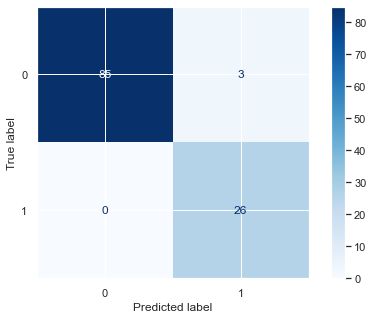

In [72]:
# Gráfico no normalizado de la martiz de confusión

disp = plot_confusion_matrix(modelo_final, X_test, y_test,
                                 cmap=plt.cm.Blues, values_format = '')
sns.set(rc={'figure.figsize':(5,5)})

**3. Curva ROC / AUC**.

* Curva ROC: Curva de la tasa de verdaderos positivos frente a la tasa de falsos positivos con diferentes umbrales de clasificación.

* AUC: (Área bajo la curva): El área bajo la curva (AUC) ROC es la probabilidad de que un clasificador tenga más confianza en que un ejemplo positivo elegido al azar sea realmente positivo en relación con que un ejemplo negativo elegido al azar sea positivo.

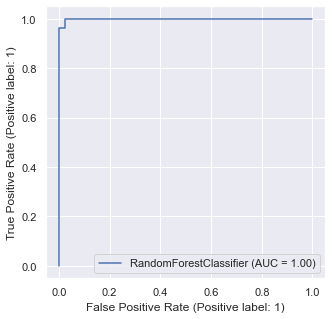

In [73]:
from sklearn.metrics import roc_auc_score, plot_roc_curve, roc_curve, auc

plot_roc_curve(modelo_final, X_test, y_test)
auc = roc_auc_score(y_test, y_predict)